In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
student_data=pd.read_csv("StudentsPerformance.csv")

In [39]:
print("======Data Headers=======")
student_data.head()

======Data Headers=======


,gender,race/ethnicity,parental level of education,lunch,test preparation course,mathscore,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,NaN,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,NaN,standard,none,76,78,75


In [41]:
student_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
gender                         1000 non-null object
race/ethnicity                 1000 non-null object
parental level of education    774 non-null object
lunch                          1000 non-null object
test preparation course        1000 non-null object
mathscore                      1000 non-null int64
reading score                  1000 non-null int64
writing score                  1000 non-null int64
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [42]:
student_data.describe()

,mathscore,reading score,writing score
count,1000.000000,1000.000000,1000.000000
mean,65.969000,69.169000,68.054000
std,15.310338,14.600192,15.195657
min,0.000000,17.000000,10.000000
25%,56.750000,59.000000,57.750000
50%,66.000000,70.000000,69.000000
75%,77.000000,79.000000,79.000000
max,100.000000,100.000000,100.000000


In [43]:
student_data.drop(['lunch','test preparation course'],axis=1, inplace=False)

,gender,race/ethnicity,parental level of education,mathscore,reading score,writing score
0,female,group B,bachelor's degree,72,72,74
1,female,group C,NaN,69,90,88
2,female,group B,master's degree,90,95,93
3,male,group A,associate's degree,47,57,44
4,male,group C,NaN,76,78,75
...,...,...,...,...,...,...
995,female,group E,master's degree,88,99,95
996,male,group C,high school,62,55,55
997,female,group C,high school,59,71,65
998,female,group D,NaN,68,78,77


In [44]:
student_data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,mathscore,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,NaN,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,NaN,standard,none,76,78,75


In [45]:
student_data["parental level of education"]= student_data["parental level of education"].fillna("school")

In [46]:
student_data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,mathscore,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,school,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,school,standard,none,76,78,75


In [47]:
student_data["race/ethnicity"]=student_data["race/ethnicity"].map({"group A":"Asian Students", "group B":"African Students","group C":"Afro-American Students","group D":"American Students","group E":"European Students"})

In [48]:
student_data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,mathscore,reading score,writing score
0,female,African Students,bachelor's degree,standard,none,72,72,74
1,female,Afro-American Students,school,standard,completed,69,90,88
2,female,African Students,master's degree,standard,none,90,95,93
3,male,Asian Students,associate's degree,free/reduced,none,47,57,44
4,male,Afro-American Students,school,standard,none,76,78,75


In [50]:
print(pd.crosstab(student_data['gender'],student_data['test preparation course']))

test preparation course  completed  none
gender                                  
female                         184   334
male                           174   308


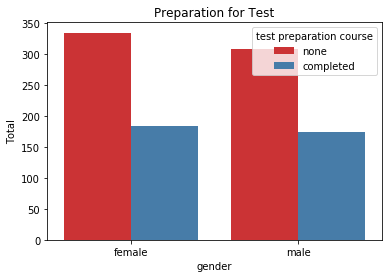

In [53]:
ax = sns.countplot(x = 'gender', hue = 'test preparation course', palette = 'Set1', data=student_data)
ax.set(title = 'Preparation for Test', xlabel = 'gender', ylabel = 'Total')
plt.show()

In [54]:
pd.crosstab(student_data['gender'],student_data['race/ethnicity'])

race/ethnicity,African Students,Afro-American Students,American Students,Asian Students,European Students
gender,,,,,
female,104,180,129,36,69
male,86,139,133,53,71


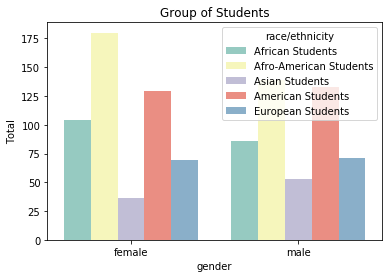

In [55]:
ax = sns.countplot(x = 'gender', data=student_data, hue = 'race/ethnicity', palette='Set3')
ax.set(title = 'Group of Students', xlabel='gender', ylabel='Total')
plt.show()

In [56]:
student_data.describe()

,mathscore,reading score,writing score
count,1000.000000,1000.000000,1000.000000
mean,65.969000,69.169000,68.054000
std,15.310338,14.600192,15.195657
min,0.000000,17.000000,10.000000
25%,56.750000,59.000000,57.750000
50%,66.000000,70.000000,69.000000
75%,77.000000,79.000000,79.000000
max,100.000000,100.000000,100.000000


In [62]:
interval=(0,40,60,75,100)
categories=['Failed','Second class','First class','Distinction']
student_data['Math_category'] = pd.cut(student_data["mathscore"], interval, labels = categories)
student_data['Read_category']=pd.cut(student_data["reading score"],interval, labels=categories)
student_data['Write_category']=pd.cut(student_data["writing score"],interval,labels=categories)
student_data['Grades']=pd.cut(student_data.mean(axis=1),interval,labels=categories)

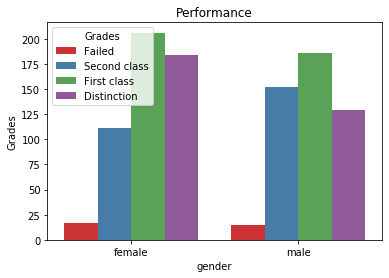

In [63]:
ax = sns.countplot(x = 'gender', data=student_data, hue = 'Grades', palette='Set1')
ax.set(title = 'Performance', xlabel='gender', ylabel='Grades')
plt.show()

In [64]:
student_data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,mathscore,reading score,writing score,Math_category,Read_category,Write_category,Grades
0,female,African Students,bachelor's degree,standard,none,72,72,74,First class,First class,First class,First class
1,female,Afro-American Students,school,standard,completed,69,90,88,First class,Distinction,Distinction,Distinction
2,female,African Students,master's degree,standard,none,90,95,93,Distinction,Distinction,Distinction,Distinction
3,male,Asian Students,associate's degree,free/reduced,none,47,57,44,Second class,Second class,Second class,Second class
4,male,Afro-American Students,school,standard,none,76,78,75,Distinction,Distinction,First class,Distinction


In [65]:
pd.crosstab(student_data.gender,student_data.Read_category)

Read_category,Failed,Second class,First class,Distinction
gender,,,,
female,12,86,195,225
male,15,162,186,119


In [69]:
student_data.Math_category.value_counts()

First class     386
Second class    289
Distinction     273
Failed           51
Name: Math_category, dtype: int64

In [70]:
student_data.Read_category.value_counts()

First class     381
Distinction     344
Second class    248
Failed           27
Name: Read_category, dtype: int64

In [71]:
student_data.Write_category.value_counts()

First class     371
Distinction     328
Second class    266
Failed           35
Name: Write_category, dtype: int64

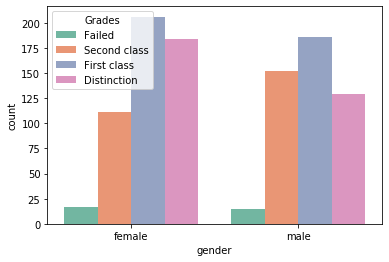

In [72]:
sns.countplot(x = 'gender', data=student_data, hue = 'Grades', palette='Set2')